This notebooks contains snippets of code showing basic image operations:
- opening
- viewing (images and movies)
- saving

In [1]:
import os

from nd2reader import ND2Reader
from tifffile import imread,imsave,TiffFile

import matplotlib.pyplot as plt
import napari

## Opening nd2 files

In [2]:
# pathway to an example nd2 image

im_dir = r'E:\Martha\2021Imaging\08242021p27\08242021loca'
im_file = r'01.nd2'

In [3]:
# reading of nd2 files
# this operation is just reading the metadata - the images are not loaded to memory
nd2_movie = ND2Reader(os.path.join(im_dir,im_file))

In [4]:
# check what is the content of the nd2 files (dimensions of imaging data)
nd2_movie.sizes

{'x': 3789, 'y': 3789, 'c': 4, 't': 289}

In [5]:
# reading a single frame from the nd2 file
test_im = nd2_movie.get_frame_2D(c=0, t=0)

In [6]:
# once the image is loaded it becomes a 2D array of numbers
# for example you can check its shape
test_im.shape

(3789, 3789)

In [7]:
# you can also check what kind of image it is - 8 bit (uint8), 16 bit (uint16) or float
test_im.dtype

dtype('uint16')

Frame([[235, 232, 244, ..., 269, 229, 237],
       [236, 236, 223, ..., 234, 210, 271],
       [210, 232, 216, ..., 306, 217, 254],
       ...,
       [270, 256, 338, ..., 252, 249, 283],
       [279, 267, 305, ..., 276, 196, 232],
       [258, 229, 217, ..., 319, 279, 236]], dtype=uint16)
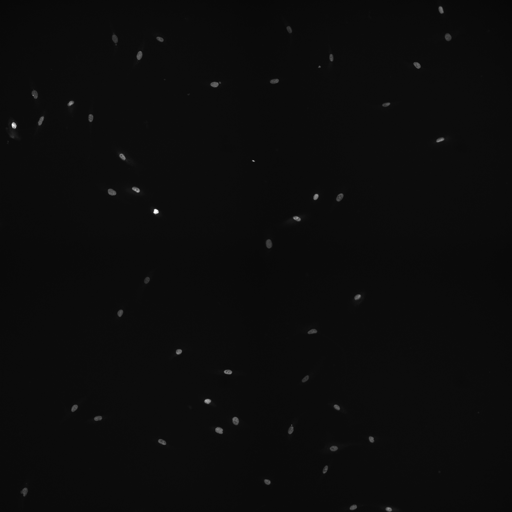

In [8]:
# image read in this way behaves as an numpy array
# but also has some additional features
# for example it can be displayed inline for a quick view
# single frame images can also be displayed inline for a quick inspection
test_im

## Opening a single frame tiff file

In [18]:
# pathway to an example single frame tiff file

im_dir = r'Z:\COOK_LAB\CELL_TRACKING\example_images'
im_file = r'labels.tif'

In [25]:
# reading of tiff files
test_tiff = imread(os.path.join(im_dir,im_file)) 

In [20]:
# once the image is loaded it becomes a 2D array of numbers
# for example you can check its shape
# it also means that it becomes independent from its original file
test_tiff.shape

(1946, 1946)

In [22]:
# you can also check what kind of image it is - 8 bit (uint8), 16 bit (uint16) or float
test_tiff.dtype

dtype('uint16')

In [43]:
# image read in this way is a numpy array
type(test_tiff)

numpy.ndarray

In [44]:
# which means that asking for a preview you will get the preview of an array
test_tiff

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

## Opening a multi page tiff file

In [63]:
# pathway to an example single frame tiff file

im_dir = r'Z:\COOK_LAB\CELL_TRACKING\example_images'
im_file = r'labels_2frames.tif'

In [37]:
# reading of a tiff file
# in this way all the frames are loaded
test_tiff2 = imread(os.path.join(im_dir,im_file)) 

In [38]:
# as all the frames are loaded, the output array is 3D
test_tiff2.shape

(2, 1946, 1946)

In [46]:
# it's also possible to open a single frame from a multi frame tiff file
# with a caveat - sometimes tiff files saved by other software are not possible to be processed in this way
test_tiff_only1 = imread(os.path.join(im_dir,im_file),key = 1) 
test_tiff_only1.shape

(1946, 1946)

## Viewing images

In [8]:
# a fast and convenient way to view images is using napari image viewer

viewer = napari.Viewer()
viewer.add_image(test_im)

C:\ProgramData\Anaconda3\envs\cellwork\lib\site-packages\napari\_vispy\vispy_camera.py:109: RuntimeWarning: divide by zero encountered in true_divide
  zoom = np.min(canvas_size / scale)


<Image layer 'test_im' at 0x1e050e2eeb0>

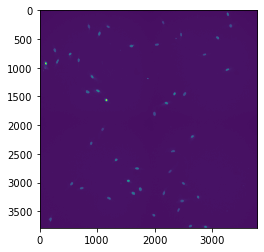

In [9]:
# it's always possible to visualize a numpy array using a matplotlib library
plt.imshow(test_im)

<IPython.core.display.Javascript object>


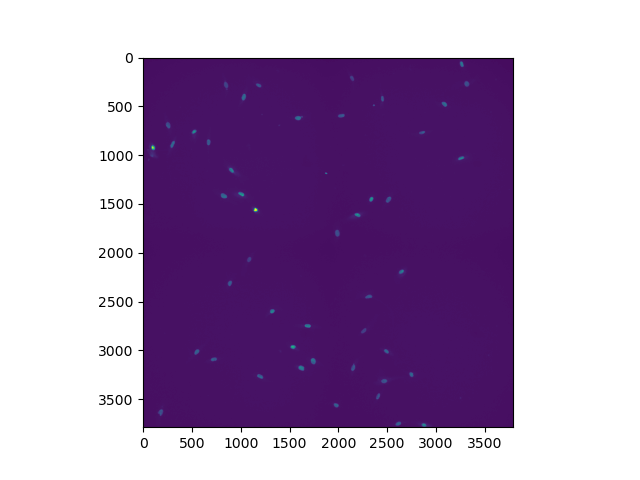

In [10]:
%matplotlib notebook
# if you use above command (cell magic) you will be able zoom in and move around the image
plt.imshow(test_im)

## Saving images

In [ ]:
# pathway to an example single frame tiff file

im_dir = r'Z:\COOK_LAB\CELL_TRACKING\example_images'
im_file = r'save_test.tif'

In [51]:
# it's not possible to save images back in the nd2 format
# it's best to use tiff format

imsave(os.path.join(im_dir,im_file),test_tiff)

In [ ]:
# if you want to save to a directory that doesn't exist yet you can create it here directly
# you cannot create many neted layers in this way (only one subdirectory per command)
# this function will fail if the directory exists
os.mkdir(myDirSave)

In [ ]:
# if you are not sure if the saving directory exists
# and don't want to see the potential error message in your scirpt
try:
    os.mkdir(myDirSave)
    print('Directory for saving created.')
except:
    print('Directory not created.')